<a href="https://colab.research.google.com/github/ToshikiNakamura0412/my_ipynb_vision/blob/master/akaze_feature_extraction_with_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 21.0 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

def extract_features_yolo(detector, img_path):
  # YOLO
  model = YOLO("yolov8n.pt")
  results = model.predict(source=img_path, save=True)

  # mask
  img = cv2.imread(img_path)
  mask = np.full(img.shape[:2], 255, dtype=np.uint8)
  for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    mask[y1:y2, x1:x2] = 0

  # extraction
  keypoints, descriptors = detector.detectAndCompute(img, mask)
  img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

  # viz
  cv2_imshow(img_with_keypoints)


image 1/1 /content/image_0.png: 384x640 10 persons, 1 bus, 248.7ms
Speed: 4.8ms preprocess, 248.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6


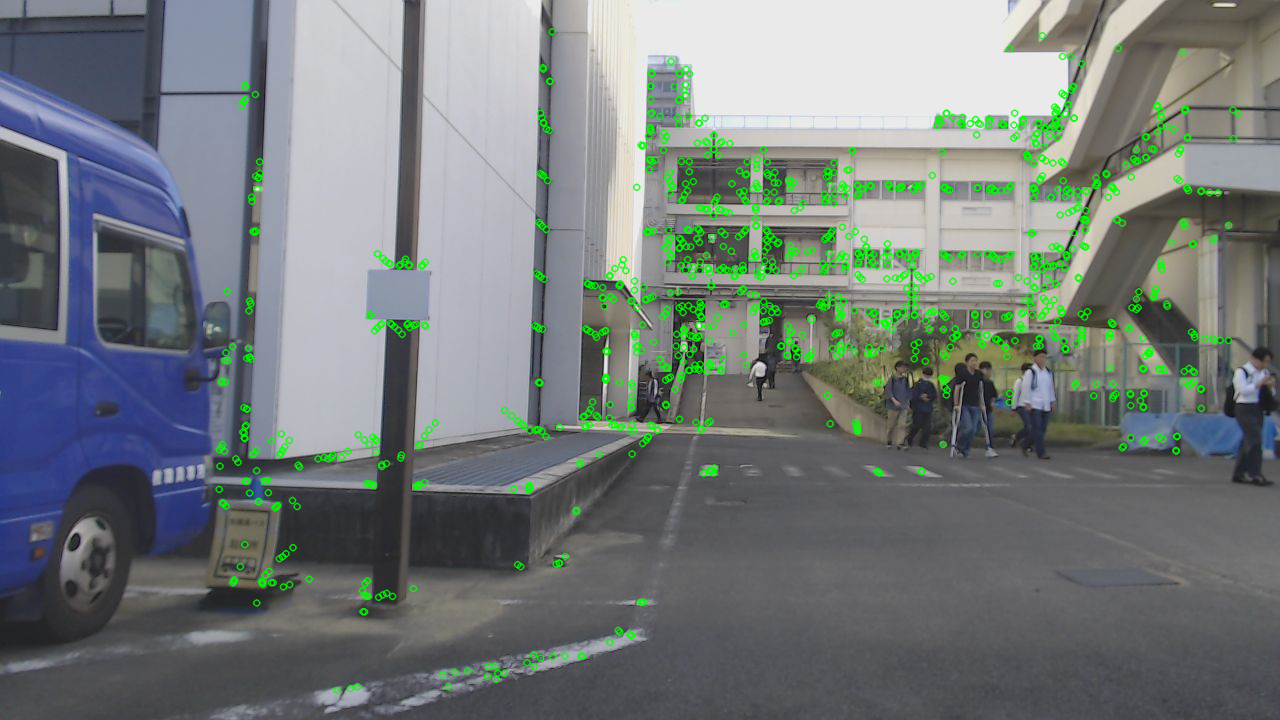

In [ ]:
detector = cv2.AKAZE_create()
extract_features_yolo(detector, "image_0.png")